# Language Detection Using Natural Language Processing

The idea behind language detection is based on the detection of the character among the expression and words in the text. The main principle is to detect commonly used words like to, of in English.

### About NLP:

Natural Language Processing (NLP) is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human languages. The primary goal of NLP is to enable computers to understand, interpret, and generate natural language, the way humans do.

NLP involves a variety of techniques, including computational linguistics, machine learning, and statistical modeling. These techniques are used to analyze, understand, and manipulate human language data, including text, speech, and other forms of communication.

Some of the main applications of NLP include language translation, speech recognition, sentiment analysis, text classification, and information retrieval. NLP is used in a wide range of industries, including finance, healthcare, education, and entertainment, to name a few.

### Basic imports and Loading Dataset:

In [1]:
#For warning-

import warnings
warnings.simplefilter("ignore")

* By default, Python will print a warning message to the console whenever it encounters a potential problem. However, you can use the warnings module to control how warnings are handled. The warnings.simplefilter("ignore") line tells Python to ignore all warnings.

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

* pandas (pd):  This is a powerful library for data manipulation and analysis. It provides data structures like DataFrames and Series, which can handle large datasets efficiently. You can use pandas to load data from various sources, clean and transform data, and perform data analysis.


* numpy (np):  NumPy is a fundamental library for scientific computing in Python. It provides efficient operations on arrays and matrices, which are essential for many data analysis tasks. Pandas is built on top of NumPy, so you'll often use them together.


* re:  The re library provides functions to work with regular expressions. Regular expressions are a powerful tool for searching, manipulating, and validating text. You can use them to extract specific information from text data, clean text data, and validate user input.


* seaborn (sns):  Seaborn is a library built on top of matplotlib that provides a high-level interface for creating statistical graphics. It offers various plot types commonly used for data exploration and visualization.


* matplotlib.pyplot (plt):  Matplotlib is a popular Python library for creating static, animated, and interactive visualizations. While seaborn provides a more user-friendly interface, matplotlib offers more control over the customization of plots.

In [3]:
#Loading Dataset-

data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Language Detection.csv")

### Knowing about Dataset:

In [4]:
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [5]:
#Getting familiar with the structure of the dataset-

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
#Checking First 5 and Last 5 values-

data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [7]:
data.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [8]:
data.shape

(10337, 2)

In [9]:
data.size

20674

In [10]:
#let’ see that what are columns available in our dataset.

data.columns

Index(['Text', 'Language'], dtype='object')

In [11]:
#Value count for each language-

data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [12]:
#To know more about the dataset with transpose – here T is for the transpose

data.describe().T

,count,unique,top,freq
Text,10337,10267,Jag är ledsen.,3
Language,10337,17,English,1385


In [13]:
#let’s check that if our dataset have null values or not

data.isnull().head(10)

,Text,Language
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Separating Independent and Dependent features:

Separating the dependent and independent variables, here text data is the independent variable and the language name is the dependent variable.

In [14]:
X = data["Text"]
y = data["Language"]

In [15]:
print(X)

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object


In [16]:
print(y)

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object


### Using Label Encoding:

* Label encoding is a technique used in data preprocessing for machine learning tasks. It involves converting categorical data (data with labels or names for categories) into numerical labels. This is important because many machine learning algorithms can only work with numerical data.


* For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
print(y)

[3 3 3 ... 9 9 9]


### Text Preprocessing:

* Text preprocessing is a crucial first step in Natural Language Processing (NLP) tasks. It involves cleaning, transforming, and preparing raw textual data  into a format that's suitable for analysis or modeling by machines.


* This is a dataset created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques.

In [19]:
#Creating a list for appending the preprocessed text-

data_list = []

In [20]:
#Iterating through all the text-

for text in X:

       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)

        # converting the text to lower case
        text = text.lower()
        
        # appending to data_list
        data_list.append(text)

### Bag of Words:

As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [22]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
X.shape 

(10337, 34937)

### Train Test Splitting:

Train-test splitting is a fundamental technique used in machine learning to assess how well a model will perform on unseen data. It involves dividing your dataset into two subsets:

* Training set: This is the larger portion of the data used to train your machine learning model. The model learns patterns and relationships from the training data to make predictions.
* Test set: This is a separate, unseen portion of the data used to evaluate the model's performance on new data it hasn't encountered during training. Ideally, the test set should be representative of the real-world data the model will be used on.

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [25]:
print('\nX_train:\n', x_train)
print('\nX_test:\n',x_test)
print('\nY_train:\n',y_train)
print('\nY_test:\n',y_test)


X_train:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

X_test:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Y_train:
 [11  4  6 ...  9 10 11]

Y_test:
 [ 8  5 10 ... 15  4  8]


### Model Training and Prediction:

In [2]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

MultinomialNB class from the naive_bayes submodule of the scikit-learn library. The MultinomialNB class implements the Naive Bayes algorithm specifically suited for classifying data represented by word counts, which is common in text classification tasks.

In [27]:
#predict the output for the test set-

y_pred = model.predict(x_test)

In [28]:
print(y_pred)

[ 8  5 10 ... 15  4  8]


### Model Evaluation:

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [30]:
#Accuracy-

print("Accuracy is :",ac)

Accuracy is : 0.9758220502901354


In [31]:
#Confusion Matrix-

print("Confusion Matrix is :",cm)

Confusion Matrix is : [[ 85   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  88   0   4   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0  91   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 305   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   3 200   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   1 102   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0  74   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0 141   0   0   1   0   3   0   0   0]
 [  0   0   0   3   0   0   0   0   0  75   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0 112   0   0   0   0   0   0]
 [  0   0   0   3   1   0   0   0   1   0   0 145   0   0   0   0   0]
 [  0   0   0   4   1   0   0   0   0   0   0   0 131   1   0   0   0]
 [  0   0   0   3   0   0   0   0   1   0   0   1   0 1

A confusion matrix is a table that visualizes the performance of a classification model. It allows you to see how many predictions were correct and incorrect for each class. 

In [32]:
#Classification_report-

print("Classification report is :",cr)

Classification report is :               precision    recall  f1-score   support

           0       1.00      0.98      0.99        87
           1       1.00      0.93      0.96        95
           2       1.00      0.99      0.99        92
           3       0.90      1.00      0.95       306
           4       0.99      0.99      0.99       203
           5       0.98      0.97      0.98       105
           6       1.00      0.96      0.98        77
           7       1.00      1.00      1.00        10
           8       0.98      0.97      0.97       146
           9       1.00      0.96      0.98        78
          10       1.00      0.98      0.99       114
          11       0.99      0.97      0.98       150
          12       1.00      0.96      0.98       137
          13       0.97      0.97      0.97       157
          14       0.98      0.99      0.98       135
          15       1.00      0.99      0.99        74
          16       1.00      0.99      1.00       102


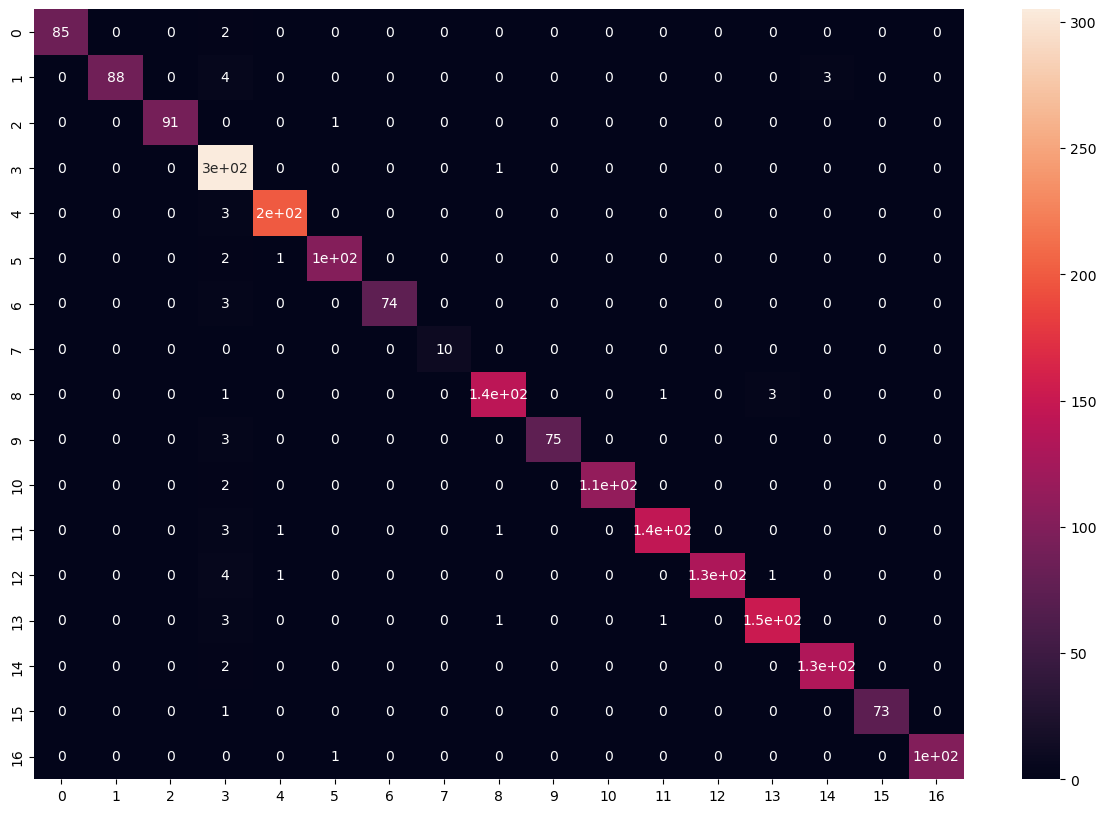

In [33]:
#Plot the confusion matrix using the seaborn heatmap-

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Predicting Some more Data:

Testing the model prediction using text in different languages.

In [34]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [35]:
predict("How are you?")

The langauge is in English


In [36]:
predict("Je te rencontre au café.")

The langauge is in French


In [37]:
predict("كيف حالك")

The langauge is in Arabic


In [38]:
predict("cumplir su condena")

The langauge is in Spanish


In [39]:
predict("മലയാളം : ഇന്ത്യൻ സംസ്ഥാനമായ കേരളത്തിലും കേന്ദ്രഭരണ പ്രദേശങ്ങളായ ലക്ഷദ്വീപിലെയും")

The langauge is in Malayalam


In [40]:
predict("Скажите пожалуйста, как пройти в палату?")

The langauge is in Russian


In [41]:
predict("Ναι, ευχαριστώ.")

The langauge is in Greek


## Thank You